# Image Processing

A process of transforming an image to a new more clearer and easier to understand image is called Image Processing

## Linear Filtering

It uses a collection of pixel values in the vicinity of a given pixel to determine its final output value. Neighborhood operators can be used to filter images to add soft blur, sharpen details, accentuate edges, or remove noise. The most widely used type of neighborhood operator is a linear filter, where an output pixel’s value is a weighted sum of pixel values within a small neighborhood 


In [2]:
import numpy as np
import cv2 as cv
from scipy import signal
import matplotlib.pyplot as plt

### Cross Correlation for 1D

In [3]:
image = np.array([1, 2, 3, 4, 5])
kernel = np.array([1/5, 1/5, 1/5, 1/5, 1/5])

print("Image: ", image)
print("Kernel: ", kernel)

output = np.correlate(image, kernel, "same")
print("Result: ", output)

Image:  [1 2 3 4 5]
Kernel:  [0.2 0.2 0.2 0.2 0.2]
Result:  [1.2 2.  3.  2.8 2.4]


### Convolution for 1D

In [5]:
image = np.array([1, 3, 4, 1, 10, 3, 0, 1])
kernel = np.array([1, 0, -1])

print("Image: ", image)
print("Kernel: ", kernel)

output = np.convolve(image, kernel, "same")
print("Result: ", output)

Image:  [ 1  3  4  1 10  3  0  1]
Kernel:  [ 1  0 -1]
Result:  [  3   3  -2   6   2 -10  -2   0]


### Cross Correlation for 2D

In [ ]:
image = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
kernel = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])

print("Image: ", image)
print("Kernel: ", kernel)

output = signal.correlate2d(image, kernel, "same")
print("Result: ", output)

### Convolution for 2D

In [4]:
image = np.array([[2, 3, 1], [0, 5, 1], [1, 0, 8]])
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

print("Image: ", image)
print("Kernel: ", kernel)

output = signal.convolve2d(image, kernel, "same")
print("Result: ", output)

Image:  [[2 3 1]
 [0 5 1]
 [1 0 8]]
Kernel:  [[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]
Result:  [[  7   7   1]
 [ -8  21  -9]
 [  5 -14  39]]


### Convolution on Image

In [ ]:
image = cv.imread("van-gogh.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.xticks([])
plt.yticks([])

#### Blur

In [ ]:
avg_3_by_3 = np.ones(9).reshape(3,3)/9

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image_3 = signal.convolve2d(image_gray, avg_3_by_3, "same")
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image_gray,  cmap='gray')
plt.subplot(122)
plt.imshow(image_3,  cmap='gray')

In [ ]:
avg_5_by_5 = np.ones(25).reshape(5,5)/25

image_5 = signal.convolve2d(image_gray, avg_5_by_5, "same")
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image_gray,  cmap='gray')
plt.subplot(122)
plt.imshow(image_5,  cmap='gray')

In [ ]:
avg_7_by_7 = np.ones(49).reshape(7,7)/49

image_7 = signal.convolve2d(image_gray, avg_7_by_7, "same")
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image_gray,  cmap='gray')
plt.subplot(122)
plt.imshow(image_7,  cmap='gray')

#### Sharpen

In [ ]:
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

image_sharpen = signal.convolve2d(image_gray, kernel_sharpen, "same")
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image_gray,  cmap='gray')
plt.subplot(122)
plt.imshow(image_sharpen,  cmap='gray')

#### Edge Detection

In [ ]:
kernel_edges = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

image_edges = signal.convolve2d(image_gray, kernel_edges, "same")
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image_gray,  cmap='gray')
plt.subplot(122)
plt.imshow(image_edges,  cmap='gray')

#### Emboss

In [ ]:
kernel_emboss = np.array([[2, -1, 0], [-1, 1, 1], [0, 1, 2]])

image_emboss = signal.convolve2d(image_gray, kernel_emboss, "same")
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image_gray,  cmap='gray')
plt.subplot(122)
plt.imshow(image_emboss,  cmap='gray')

### Convolution using OpenCV

In [ ]:
image_3_cv = cv.filter2D(image, -1, kernel_3)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image)

plt.subplot(122)
plt.imshow(image_3_cv)

### Gaussian Filter

([], <a list of 0 Text yticklabel objects>)

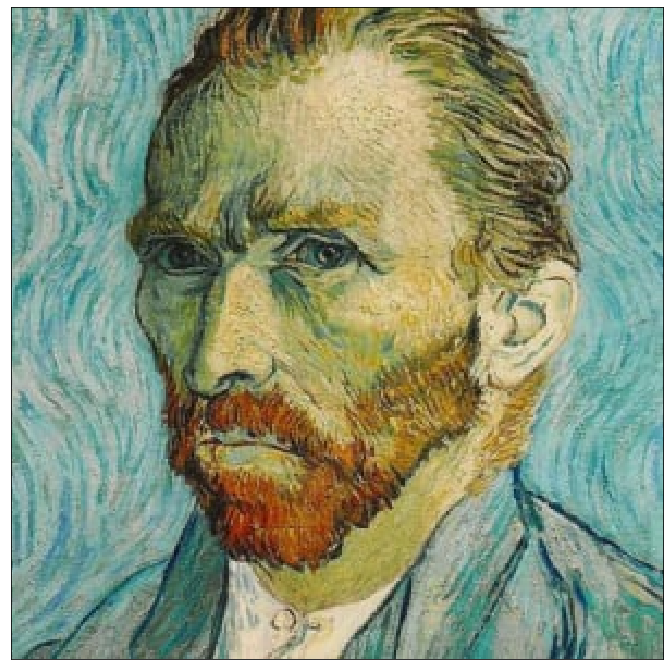

In [2]:
image = cv.imread("van-gogh.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.xticks([])
plt.yticks([])

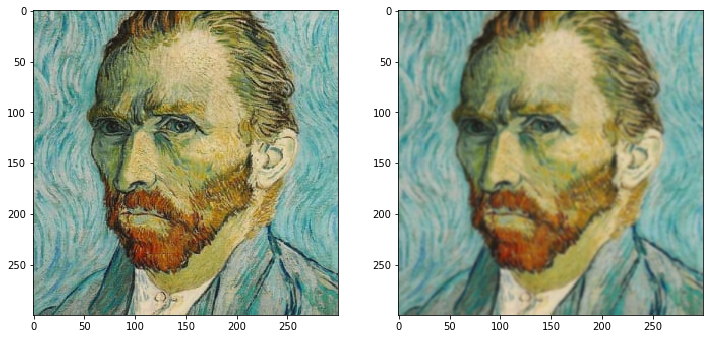

In [4]:
gauss_filter = cv.GaussianBlur(image, (5,5), 0)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(gauss_filter)

### Separability

In [42]:
F = np.array([1,2,1,2,4,2,1,2,1]).reshape(3,3)
print('F =\n{}'.format(F))

u, s, vh = np.linalg.svd(F)

print(f'Singular values of F are: {s}')

print(u)

print(vh)

F =
[[1 2 1]
 [2 4 2]
 [1 2 1]]
Singular values of F are: [6.00000000e+00 4.53246652e-16 0.00000000e+00]
[[-4.08248290e-01  9.12870929e-01 -7.81734838e-17]
 [-8.16496581e-01 -3.65148372e-01 -4.47213595e-01]
 [-4.08248290e-01 -1.82574186e-01  8.94427191e-01]]
[[-0.40824829 -0.81649658 -0.40824829]
 [-0.91287093  0.36514837  0.18257419]
 [ 0.         -0.4472136   0.89442719]]


In [75]:
if (s[~np.isclose(s, 0)].shape == (1,)):
    print("Filter is separable")
    index = np.where(~np.isclose(s, 0) == True)[0][0]
    value = s[~np.isclose(s, index)]
    vertical_filter = np.sqrt(value)*u[:,index].reshape(3, 1)
    horizontal_filter = np.sqrt(value)*vh[index,:].reshape(1, 3)
    print("Vertical Filter:\n", vertical_filter)
    print("Horizontal Filter:\n", horizontal_filter)
    print("Original Filter:\n", np.dot(vertical_filter, horizontal_filter))
else:
    print("Filter is not separable")

Filter is separable
Vertical Filter:
 [[-1.]
 [-2.]
 [-1.]]
Horizontal Filter:
 [[-1. -2. -1.]]
Original Filter:
 [[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]
